In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os

In [2]:
%%time
BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"
BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")

In [ ]:
import holoviews as hv
hv.notebook_extension()

In [ ]:
## Relevant BES variables for 2015 Campaign

# CampaignDayW5
# wt_daily_W5
# enddateW5 (formatted)

In [8]:
# underlying total distribution of Most Important Issue responses
BES_Panel["miilabelW5"].value_counts()

economy general         7100
immigration             6110
nhs                     3548
Don't know              2444
services-spending       1177
social inequalities      935
poverty, living stds     838
election outcome         648
housing                  602
unemployment             564
environment              477
No problem               437
terrorism                427
politics-neg             402
europe                   377
education                252
consumer debt            233
international probs      157
welfare fraud            115
crime                    111
taxation                  90
national security         87
pensions                  55
scot const                45
inflation                 17
iraq war                   9
constitutional             8
civil liberties            5
youth                      4
aging population           1
flooding                   1
class difference           1
Name: miilabelW5, dtype: int64

In [44]:
# sample size on each day (mean ~810)
BES_Panel["CampaignDayW5"].value_counts().sort_index()

1.0      796
2.0      974
3.0      987
4.0      910
5.0      885
6.0      762
7.0      776
8.0      792
9.0      890
10.0     667
11.0     745
12.0     672
13.0     638
14.0     757
15.0     829
16.0     785
17.0     716
18.0     771
19.0     635
20.0     633
21.0     805
22.0     826
23.0     785
24.0     439
25.0    1003
26.0     708
27.0     741
28.0     725
29.0     844
30.0     933
31.0     886
32.0     927
33.0     804
34.0     930
35.0     892
36.0    1016
37.0    1048
38.0     882
Name: CampaignDayW5, dtype: int64

In [34]:
# actual crosstabs of campaign day vs MII
crosstab = pd.crosstab(index   = BES_Panel[ 'CampaignDayW5' ],
                       columns = BES_Panel[ "miilabelW5" ],
                       values  = BES_Panel[ "wt_daily_W5" ],
                       aggfunc = sum,
                       normalize='index')
crosstab

miilabelW5,No problem,unemployment,nhs,immigration,economy general,international probs,politics-neg,housing,"poverty, living stds",services-spending,...,civil liberties,class difference,taxation,pensions,youth,inflation,flooding,iraq war,constitutional,Don't know
CampaignDayW5,,,,,,,,,,,,,,,,,,,,,
1.0,0.021962,0.005446,0.122047,0.247926,0.270870,0.010065,0.011934,0.036138,0.029629,0.026267,...,0.000000,0.000000,0.002877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090710
2.0,0.028320,0.023269,0.129672,0.252953,0.254895,0.004362,0.011461,0.026903,0.029311,0.032342,...,0.000000,0.000000,0.003352,0.002141,0.000000,0.001066,0.000000,0.000572,0.000000,0.075046
3.0,0.014075,0.022491,0.137749,0.247341,0.255908,0.002966,0.005798,0.011391,0.039432,0.024155,...,0.000000,0.000000,0.002457,0.001705,0.000000,0.000972,0.000000,0.000524,0.000914,0.111393
4.0,0.020817,0.016795,0.138013,0.256564,0.240158,0.005022,0.011853,0.033553,0.023751,0.037933,...,0.000000,0.000000,0.001686,0.003857,0.001480,0.000000,0.000000,0.000000,0.000000,0.093793
5.0,0.018179,0.025961,0.121547,0.253200,0.259031,0.001662,0.008675,0.013351,0.029728,0.029082,...,0.000000,0.000000,0.004220,0.001091,0.000000,0.004592,0.000000,0.000000,0.000686,0.104458
6.0,0.021300,0.021466,0.143082,0.225884,0.250122,0.003719,0.011806,0.027880,0.034256,0.042845,...,0.000000,0.000000,0.004639,0.001009,0.001155,0.000000,0.000000,0.000000,0.002045,0.095232
7.0,0.005546,0.028134,0.139902,0.193222,0.259334,0.004888,0.014556,0.030331,0.036293,0.051899,...,0.000000,0.000000,0.003777,0.001208,0.001288,0.002667,0.000000,0.000000,0.001341,0.118328
8.0,0.019742,0.014513,0.137521,0.205158,0.270931,0.020092,0.008198,0.018616,0.035735,0.020808,...,0.000000,0.000000,0.002001,0.001422,0.000000,0.000000,0.000000,0.001387,0.000000,0.101155
9.0,0.019541,0.026373,0.120980,0.278979,0.239381,0.006139,0.006745,0.016634,0.027428,0.031313,...,0.000000,0.000000,0.003167,0.001538,0.000000,0.001385,0.000000,0.000000,0.000677,0.104209


b':HoloMap   [MII]\n   :Curve   [Campaign Day]   (Most Important Issue)'
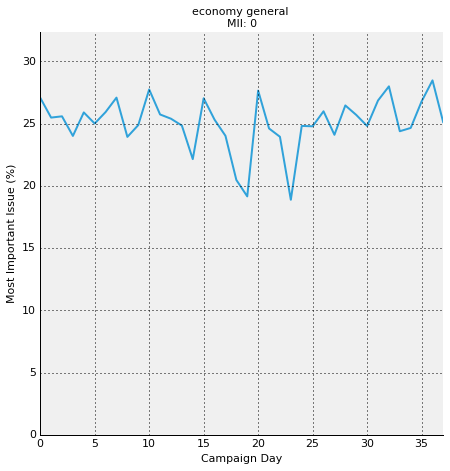
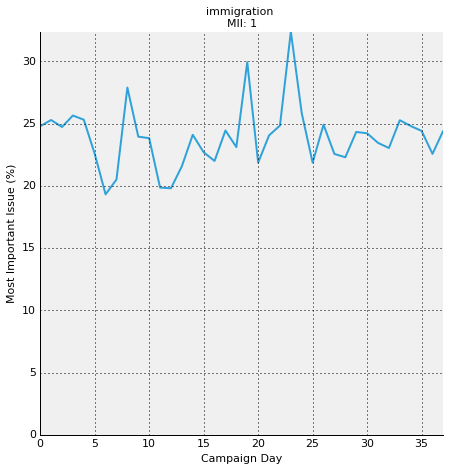
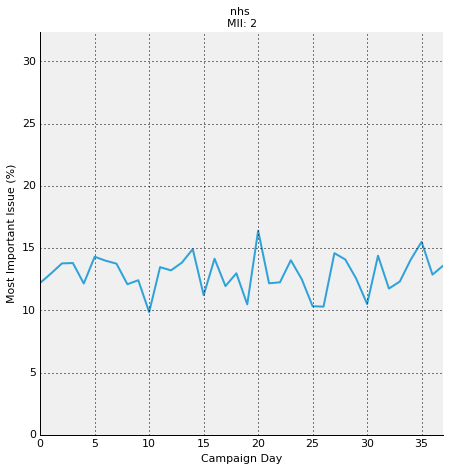
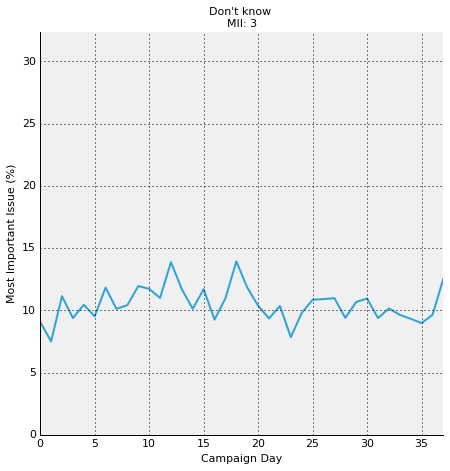
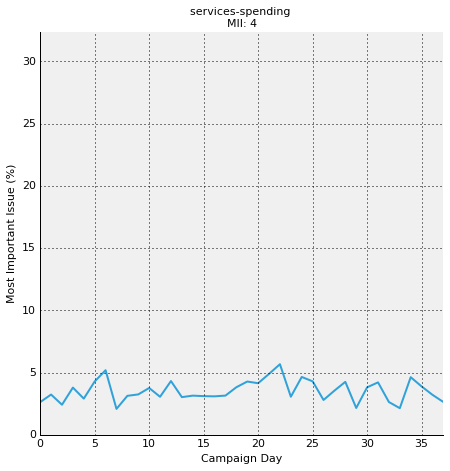
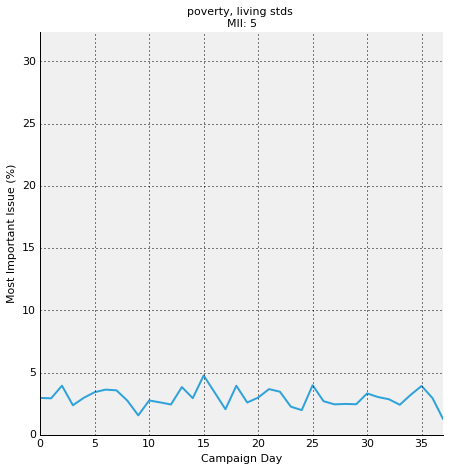
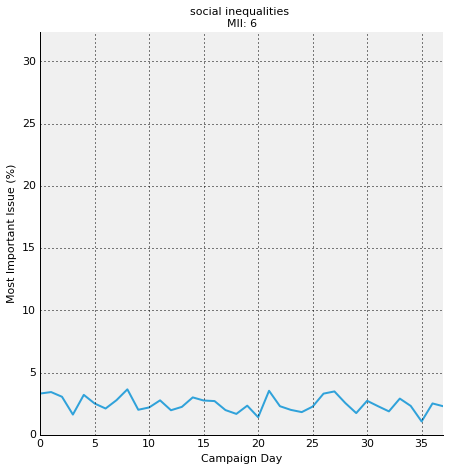
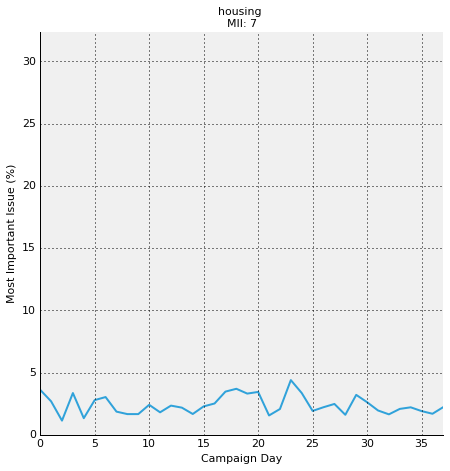
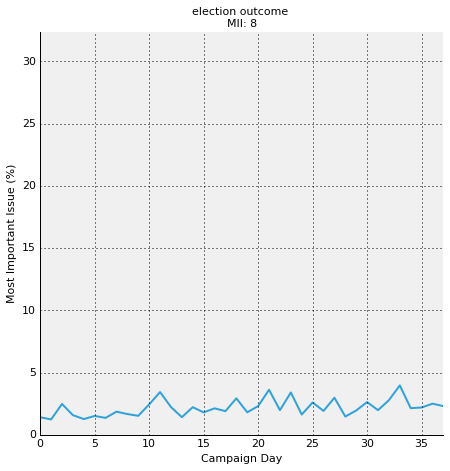
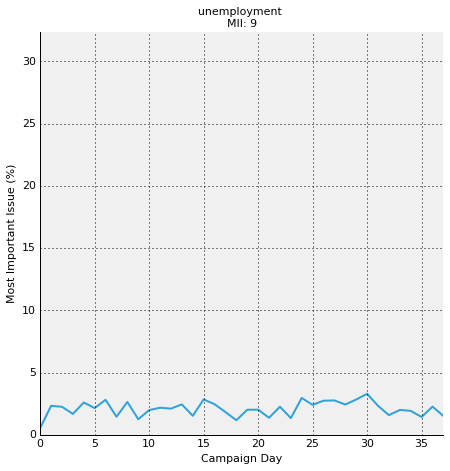
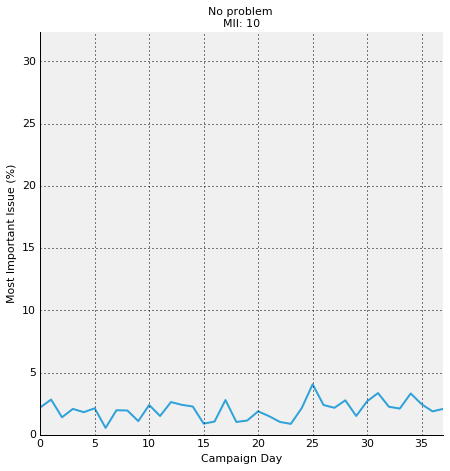
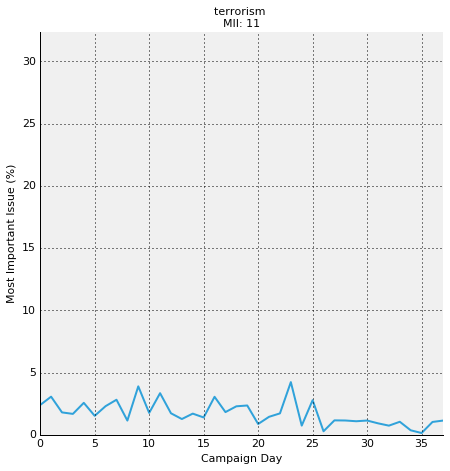
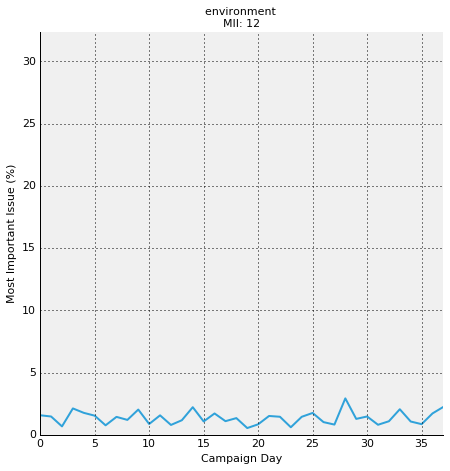
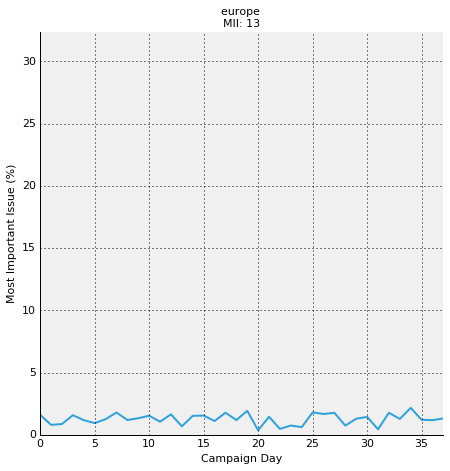
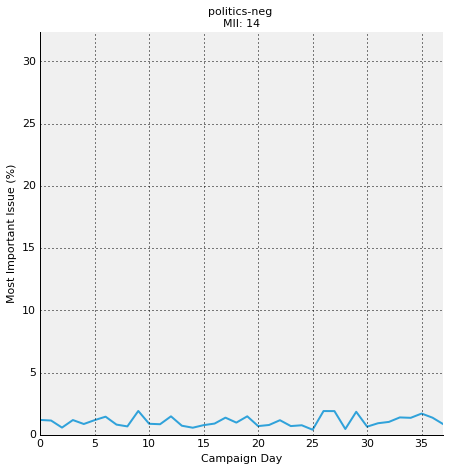
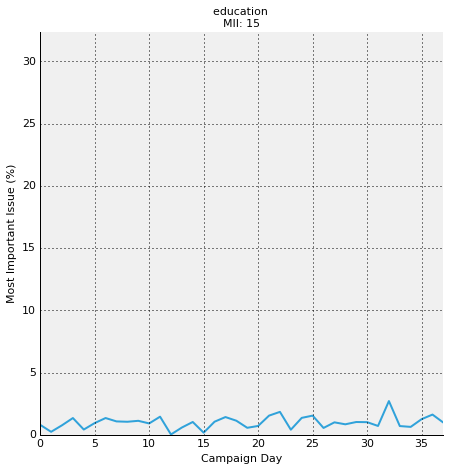
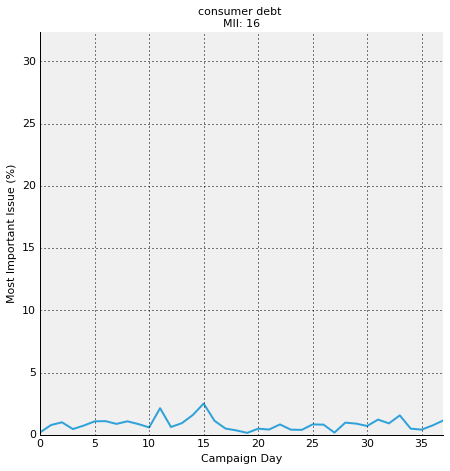
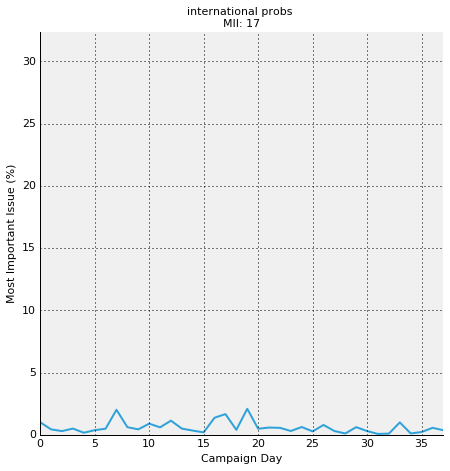
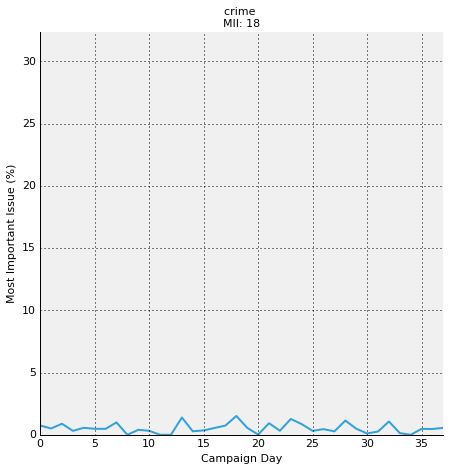
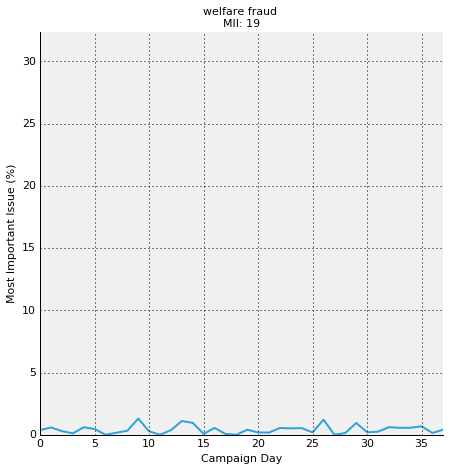
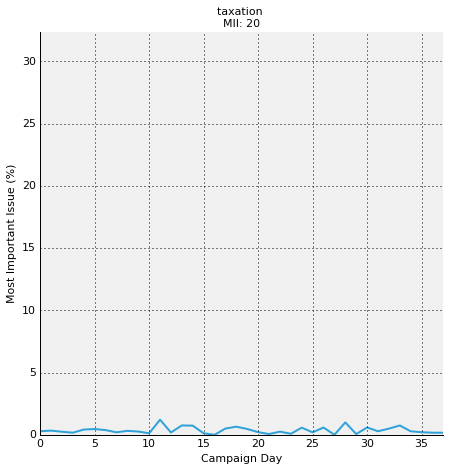
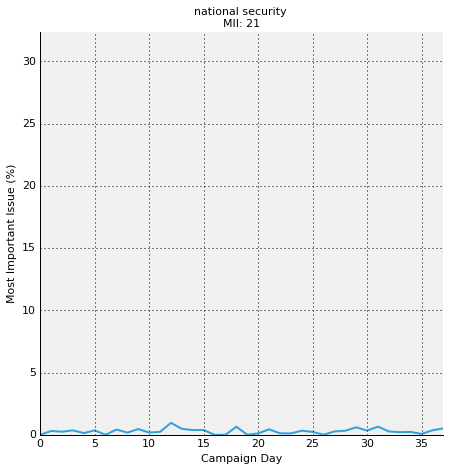
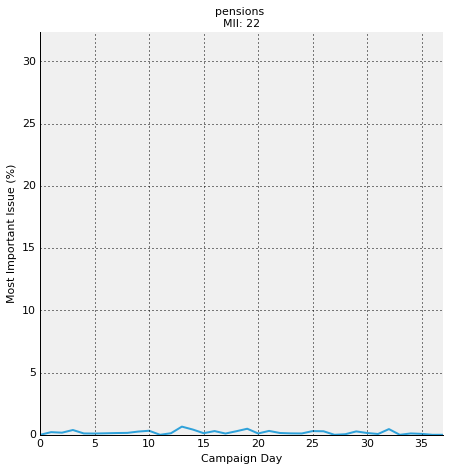
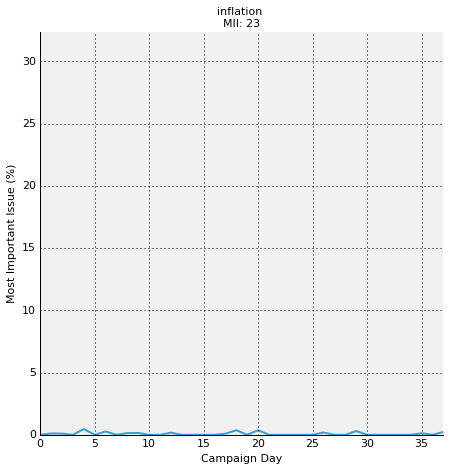
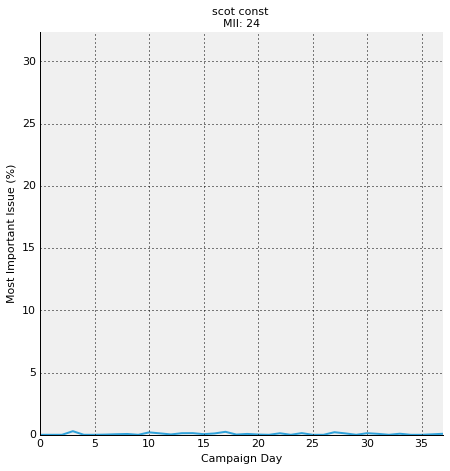
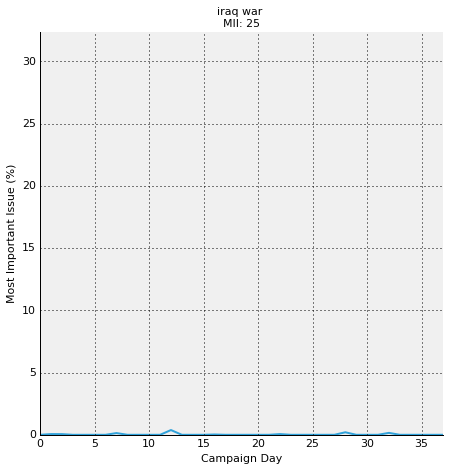
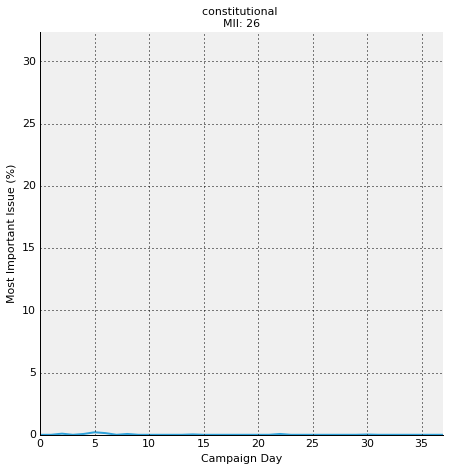
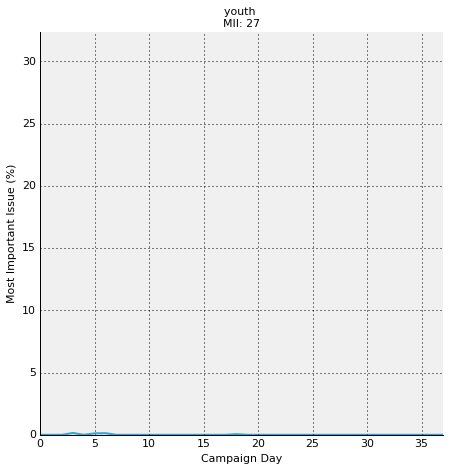
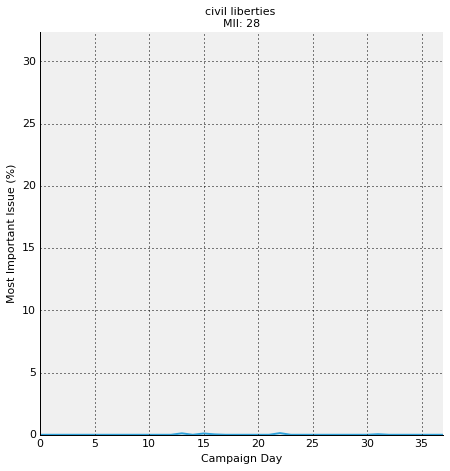
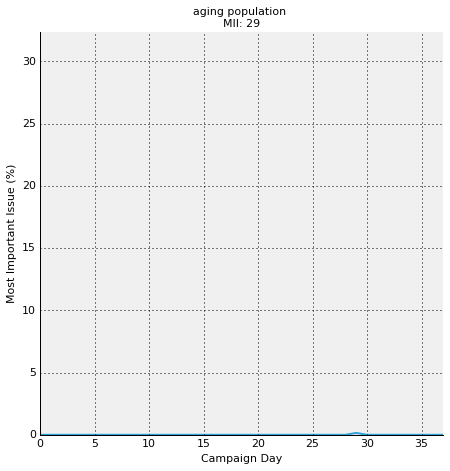
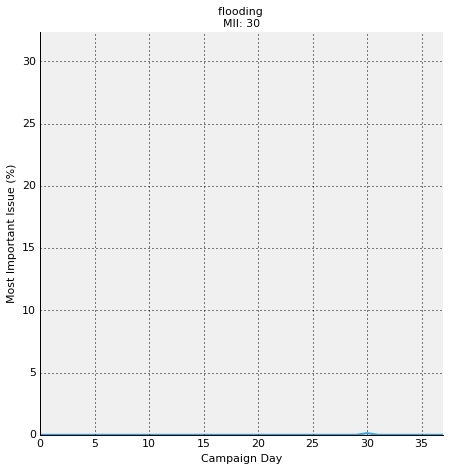
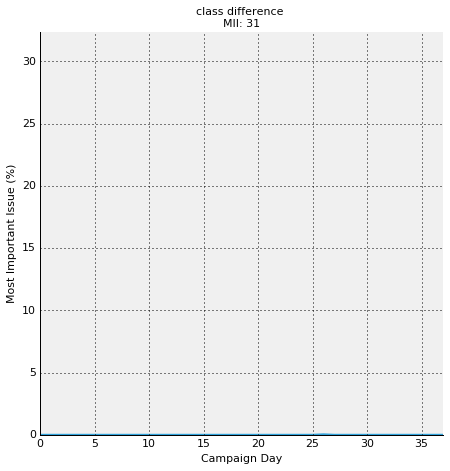

In [40]:
%%output size = 200

x_axis = "Campaign Day"
y_axis = "Most Important Issue"

x_dim = hv.Dimension(x_axis, values = crosstab.index)
y_dim = hv.Dimension(y_axis, unit = '%')

curves = hv.HoloMap(kdims=['MII'])

ordered_columns = crosstab.sum().sort_values(ascending=False).index

for mii in range(0 , len( crosstab.columns) ):

    curves[mii] = hv.Curve(crosstab[ ordered_columns[mii] ] * 100,
                           kdims = [x_dim] ,
                           vdims = [y_dim], label=ordered_columns[mii] )


curves